In [9]:
import plot_utils
from plot_utils import Roller,LogFile,Fig
import rolling_funcs as fn
import matplotlib.pyplot as plt

WINDOW_LEN_SECS = 20.0

## What's going on
- Max throughput is around 27 RPS (see `./241028_normal_operation`).
- If the combined throughput of normal operation and an attack is > 27 RPS, request loads are
throttled and some buffer(?) starts filling up.
- After some time the buffer overflows and response rates drop for both loads.
- ERR responses (due to time-outs and connection-resets) start getting received some time later.

/var/folders/82/6xch38_95_d545t14cp867pc0000gr/T/ipykernel_85515/4058002598.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


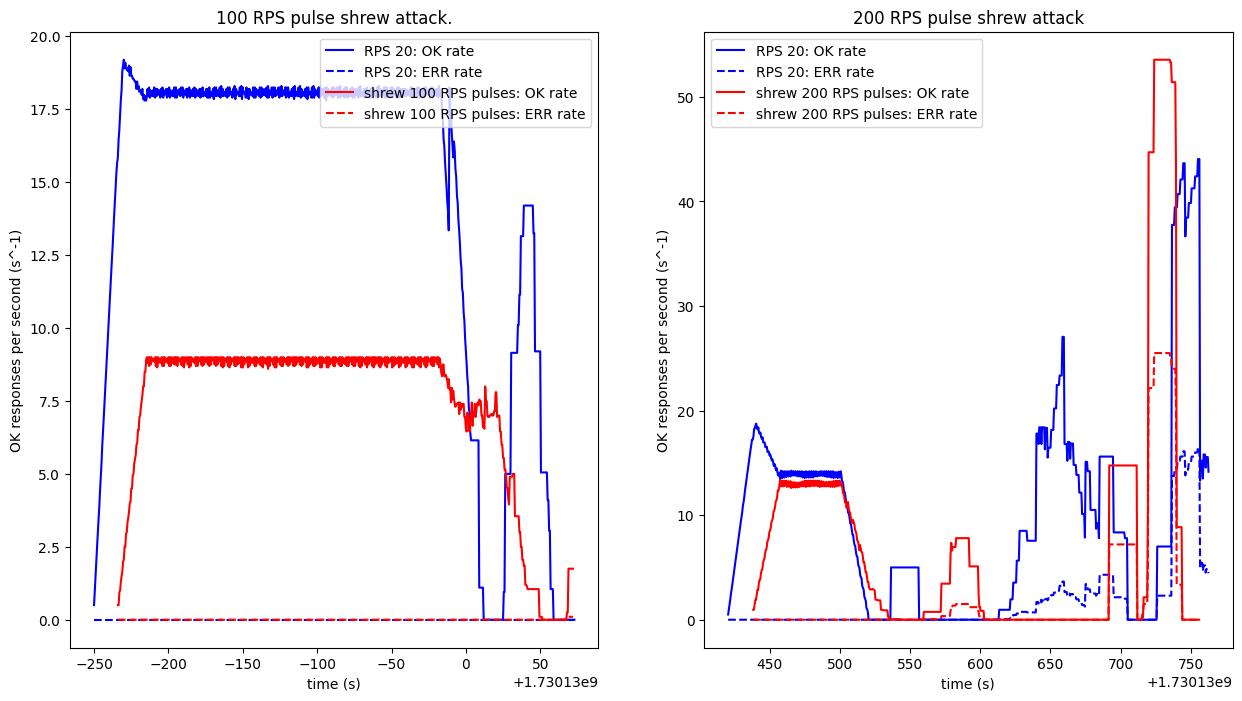

In [10]:
logfiles = [{
    "RPS 20" : LogFile(path="./logs/kleene/2024-10-28_15-35-49.490421.txt", kwargs={'c':'b'}),
    "shrew 100 RPS pulses" : LogFile(path="./logs/mac/2024-10-28_15-36-05.503467.txt", kwargs={'c':'r'}),
}, {
    "RPS 20" : LogFile(path="./logs/kleene/2024-10-28_15-47-00.018368.txt", kwargs={'c':'b'}),
    "shrew 200 RPS pulses" : LogFile(path="./logs/mac/2024-10-28_15-47-17.864886.txt", kwargs={'c':'r'}),
}
]
rollers = [
    Roller("OK rate", fn.count_ok, rate=True),
    Roller("ERR rate", fn.count_err, rate=True, kwargs={'linestyle':'--'}),
]

fig,axes = plot_utils.fig(subplots=(1,2), figs=[
    Fig(title='100 RPS pulse shrew attack.', x='time (s)', y='OK responses per second (s^-1)'),
    Fig(title='200 RPS pulse shrew attack', x='time (s)',y='OK responses per second (s^-1)')
    ])


[ plot_utils.overlay(ax,lf,rollers,window_secs=WINDOW_LEN_SECS, const_stride_secs=0.5, zeroed_times=False) for ax,lf in zip(axes,logfiles) ]
[ ax.legend() for ax in axes ]
fig.show()

## What happens if the combined load < 27 RPS?

/var/folders/82/6xch38_95_d545t14cp867pc0000gr/T/ipykernel_85515/2828051590.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


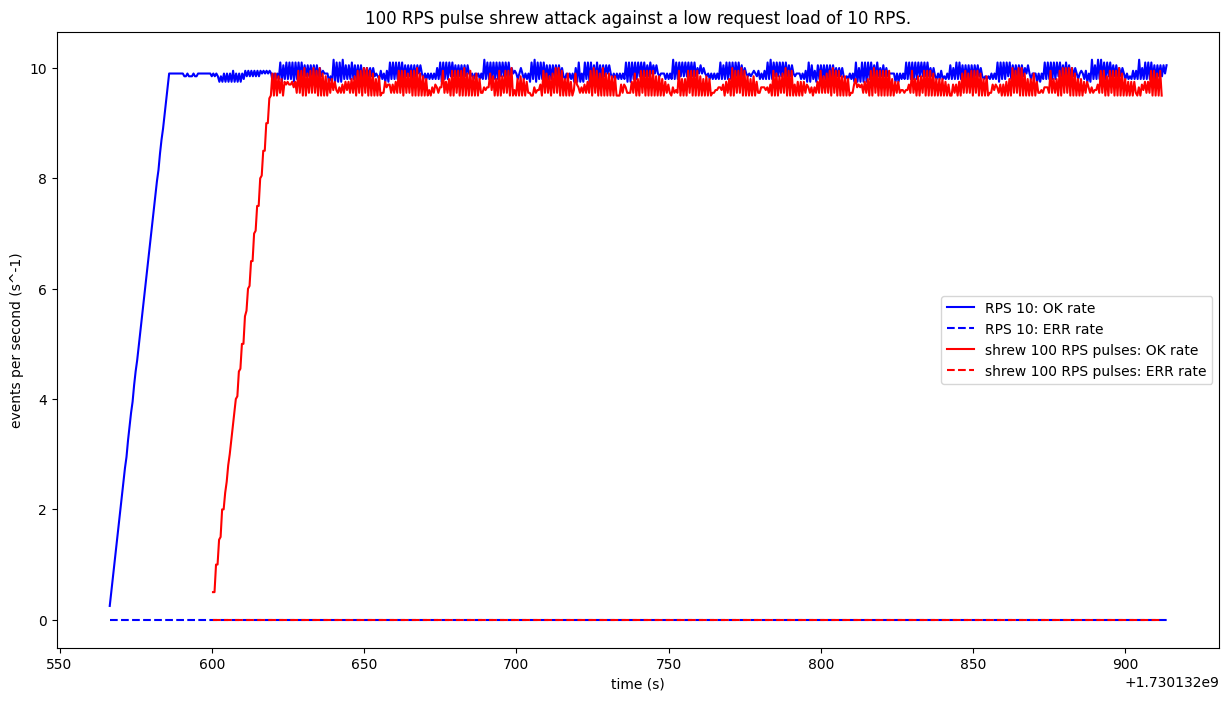

In [14]:
logfiles = [{
    "RPS 10" : LogFile(path="./logs/kleene/2024-10-28_16-22-45.983591.txt", kwargs={'c':'b'}),
    "shrew 100 RPS pulses" : LogFile(path="./logs/mac/2024-10-28_16-23-19.882642.txt", kwargs={'c':'r'}),
}, 
# {
#     "RPS 20" : LogFile(path="./logs/kleene/2024-10-28_15-47-00.018368.txt", kwargs={'c':'b'}),
#     "shrew 200 RPS pulses" : LogFile(path="./logs/mac/2024-10-28_15-47-17.864886.txt", kwargs={'c':'r'}),
# }
]
rollers = [
    Roller("OK rate", fn.count_ok, rate=True),
    Roller("ERR rate", fn.count_err, rate=True, kwargs={'linestyle':'--'}),
]

fig,axes = plot_utils.fig(figs=[
    Fig(title='100 RPS pulse shrew attack against a low request load of 10 RPS.', x='time (s)', y='events per second (s^-1)'),
    # Fig(title='200 RPS pulse shrew attack', x='time (s)',y='OK responses per second (s^-1)')
    ])
axes = [axes]

[ plot_utils.overlay(ax,lf,rollers,window_secs=WINDOW_LEN_SECS, const_stride_secs=0.5, zeroed_times=False) for ax,lf in zip(axes,logfiles) ]
[ ax.legend() for ax in axes ]
fig.show()